<a href="https://colab.research.google.com/github/Eduflores1497/Examen-Parcial/blob/main/ExamenProblema25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

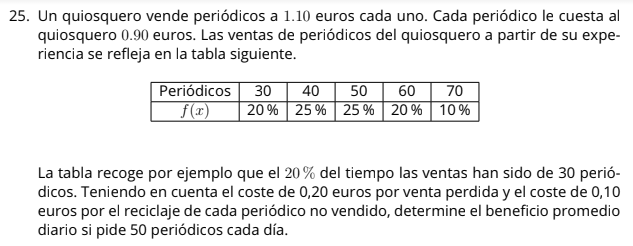

# **1,2,3.Identifique las variables aleatorias, su distribución de probabilidad y modele las variables aleatorias**
Sea:\
$X=$ Las ventas diarias de periodicos del quiosquero

Donde **$X$** puede tomar los siguientes valores 
>**$X={[30,40,50,60,70]}$** 

Donde cada valor que puede tomar **$X$** representan las ventas diarias de periodicos del quiosquero con estas probabilidades:
>$P={[0.20,0.25,0.25,0.20,0.10]}$

# **4.Defina el modelo del sistema y los objetivos de la simulacion**
En este modelo vamos a tomar como un evento la ganancia total del quiosquero en un día, donde la variable aleatoria $X$ son el número de periodicos vendidos y nuestras iteraciones en el ciclo representarán un día simulado, por lo que en cada iteración obtendremos el número de periodicos vendidos en un día y con eso calcularemos la ganancia total del día.  Tomando en cuenta el beneficio de 0.20 euros por periodico vendido, el costo de 0.20 euros por venta perdida y 0.10 euros de costo por el reciclaje de un periodico no vendido. Buscamos determinar la ganancia promedio diario del quiosquero.


**Insico a**


Este modelo va a determinar la ganancia promedio diario con un pedido de 50 periodicos para vender cada día. 

**Estructura del modelo a**

Sea 

z=ganancia diario del quiosquero

pedido=50 periodicos.

a=número de ventas reales

b=número de periodicos reciclados

c=número de ventas perdidas

>Si $X> pedido$

ventas reales=pedidos     $(a=pedido)$

ventas perdidas=$X$-pedido     $(c=X-pedido)$

periodicos reciclados=0      $(b=0)$

>Si $X\leq$$pedido$

ventas reales=$X$ $(a=X)$

ventas perdidas=0 $(c=0)$

periodicos reciclados=pedido$-X$ $(b=pedido-X)$

**Objetivos de la simulación del inciso a**



1.   calcular la ganancia diario $(Z)$ como
>$Z=1.10*a-0.90*pedidos-0.10*b-0.20*c$
2.   Calcular la ganancia diario promedio con 50 pedidos diarios.

**Objetivos de la simulación del inciso c**

1.   Obtener la ganancia diaria promedio con 30,40,50,60,70 pedidos de periodicos al día
2.   Determinar cúal es el pedido ideal de periodicos al día.




**4.a** Simulamos el evento de la ganancia diario del quiosquero una sola vez.

In [305]:
import numpy as np
import random as rand
import math as mat
import matplotlib.pyplot as plt
from scipy.stats import norm

In [306]:
def eventoA(n): #n= número de pedidos al día
  pedido=n
  a=0 #número de ventas producidas
  b=0 #número de reciclajes producidos
  c=0 #número de ventas no producidas
  z=0 #ganancia del día
  x=np.random.choice([30,40,50,60,70],p=[0.20,0.25,0.25,0.20,0.10]) #El número de ventas al día
  if x>pedido:  #Aplicamos el modelo en función a x
    a=pedido
    b=0
    c=x-pedido
    z=(1.10*a)-(0.90*pedido)-(0.10*b)-(0.20*c)
  if x<=pedido: #Aplicamos el modelo en función a x
    a=x
    b=pedido-x
    c=0
    z=(1.10*a)-(0.90*pedido)-(0.10*b)-(0.20*c)
  return z  #Ganancia en un día

In [247]:
a=eventoA(50) #con 50 pedidos
print(a)

8.000000000000007


**4.c** Vamos a simular un evento con 30, 40, 60 y 70 pedidos.

**Con 30 pedidos**

In [248]:
b=eventoA(30)
print(b)

4.0


**Con 40 pedidos**

In [249]:
c=eventoA(40)
print(c)

4.0


**Con 60 pedidos**

In [250]:
d=eventoA(60)
print(d)

-24.0


**Con 70 pedidos**

In [251]:
e=eventoA(70)
print(e)

2.0


#**5. Diseñe el experimento**

**5.aVamos a simular 1000 días de ventas en el quiosquero para determinar la ganancia diaria promedio de una muestra con 50 pedidos.**

In [252]:
def simulacion(n):  #n=número de pedidos al día
  ganancia=0  #Contador de ganancias al día
  promedio=[] #promedio de las ganancias
  for i in range(1000): #Durante 1000 días
    ganancia=ganancia+eventoA(n)  #Calcular la ganancia acumulada por día con n pedidos
    promedio.append(ganancia/(i+1)) #Sacar el promedio de las ganancias al día con n pedidos
  return promedio #Regresa una lista con los promedios para la gráfica de estabilidad

In [307]:
p50=simulacion(50)

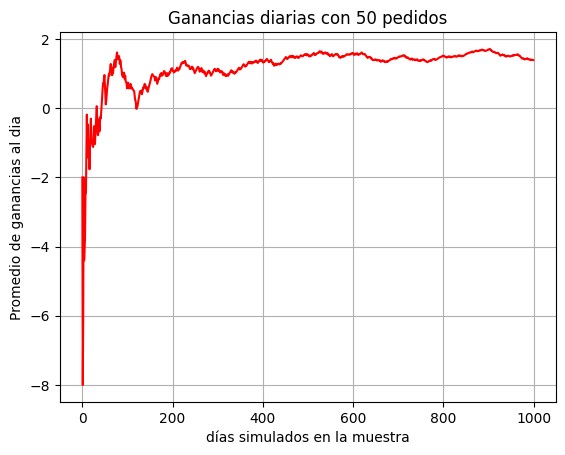

In [326]:
plt.plot(p50, 'r')
plt.title('Ganancias diarias con 50 pedidos')
plt.ylabel('Promedio de ganancias al dia')
plt.xlabel('días simulados en la muestra')
plt.grid(True)
plt.show()

In [309]:
print ('La ganancia promedio esperada es',np.mean(p50),'euros y su desviación estandar es',np.std(p50),'euros')

La ganancia promedio esperada es 1.1944712045104504 euros y su desviación estandar es 0.7055350887465879 euros


**5.cVamos a simular 2000 días de ventas en el quiosquero para determinar la ganancia diaria promedio de una muestra con 30,40,60 y 70 pedidos.**

**Con 30 pedidos**

In [311]:
p30=simulacion(30)

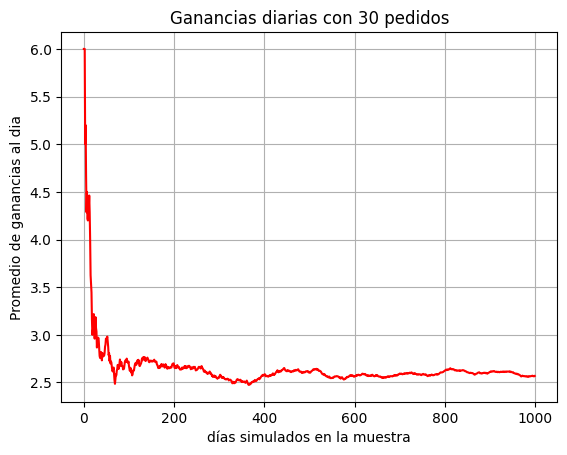

In [327]:
plt.plot(p30,'r')
plt.title('Ganancias diarias con 30 pedidos')
plt.ylabel('Promedio de ganancias al dia')
plt.xlabel('días simulados en la muestra')
plt.grid(True)
plt.show()

In [313]:
print ('La ganancia promedio esperada es',np.mean(p30),'euros y su desviación estandar es',np.std(p30),'euros')

La ganancia promedio esperada es 2.650658753267069 euros y su desviación estandar es 0.2914313739176315 euros


**Con 40 pedidos**

In [314]:
p40=simulacion(40)

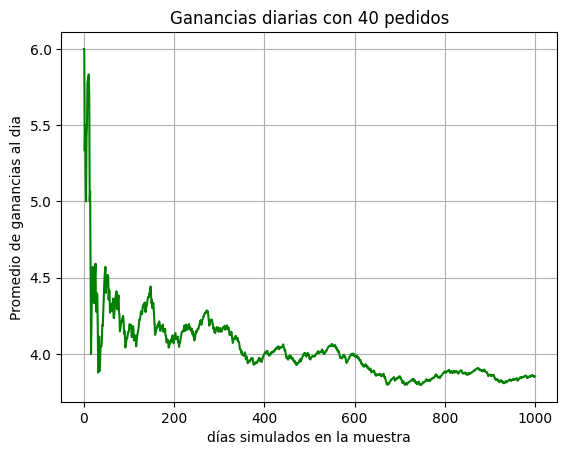

In [328]:
plt.plot(p40,'g')
plt.grid(True)
plt.title('Ganancias diarias con 40 pedidos')
plt.ylabel('Promedio de ganancias al dia')
plt.xlabel('días simulados en la muestra')
plt.show()

In [316]:
print ('La ganancia promedio esperada es',np.mean(p40),'euros y su desviación estandar es',np.std(p40),'euros')

La ganancia promedio esperada es 4.031783055540323 euros y su desviación estandar es 0.2498962708424047 euros


**Con 60 pedidos**

In [317]:
p60=simulacion(60)

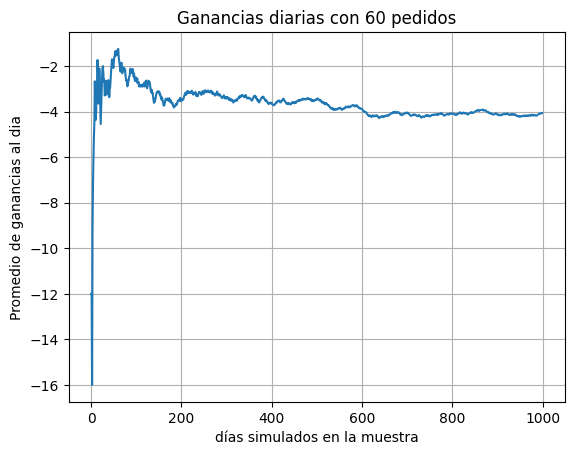

In [329]:
plt.plot(p60)
plt.grid(True)
plt.title('Ganancias diarias con 60 pedidos')
plt.ylabel('Promedio de ganancias al dia')
plt.xlabel('días simulados en la muestra')
plt.show()

In [319]:
print ('La ganancia promedio esperada es',np.mean(p60),'euros y su desviación estandar es',np.std(p60),'euros')

La ganancia promedio esperada es -3.663747649674615 euros y su desviación estandar es 0.8148158517174833 euros


**Con 70 pedidos**

In [320]:
p70=simulacion(70)

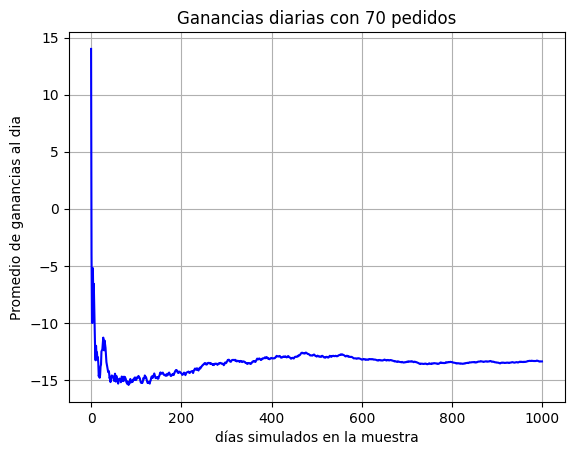

In [330]:
plt.plot(p70,'b')
plt.grid(True)
plt.title('Ganancias diarias con 70 pedidos')
plt.ylabel('Promedio de ganancias al dia')
plt.xlabel('días simulados en la muestra')
plt.show()

In [322]:
print ('La ganancia promedio esperada es',np.mean(p70),'euros y su desviación estandar es',np.std(p70),'euros')

La ganancia promedio esperada es -13.48608614927636 euros y su desviación estandar es 1.2150316451508343 euros


# **6.Calcular N y repetir ambas politicas N veces para comparar cuál es la mejor**

Calculamos N para saber el número de muestras que necesitamos.\

$$ N > \Bigg( \frac{2 \sigma z_{\alpha/2}}{\epsilon} \Bigg) ^2 $$

**6.a con 50 pedidos**

In [323]:
n50= (2*np.std(p50)*1.96/0.05)**2 #Calculo de N
print(n50)
N50=mat.ceil(n50)#Redondeamos N al entero de arriba

3059.633170554435


Repetimos el experimento N=N50 veces con 1000 días simuladas en cada muestra

In [334]:
def modelop5(n):  #N calculado como número de simulaciones
    gananciaspromedio=[]
    for i in range(n):  #Repetimos el modelo N veces
        s = simulacion(50) #Mandamos a llamar a nuestra función que calcula la ganancia promedio en 1000 días como una muestra
        gananciaspromedio.append(np.mean(s))  #Calculamos la media de ganancia al día con 1000 días como una muestra
    return gananciaspromedio  #Lista de tamaño N con las medias muestrales, donde cada muestra es la ganancia promedio al día al simular 2100 días

In [325]:
mod50=modelop5(N50)

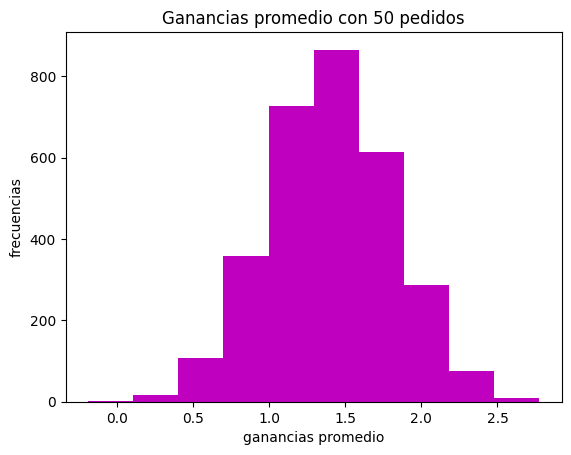

In [331]:
plt.hist(mod50, color='m')
plt.xlabel('ganancias promedio')
plt.ylabel('frecuencias')
plt.title('Ganancias promedio con 50 pedidos')
plt.show()

In [335]:
print('Las ganancias promedio son',np.mean(mod50),'euros y con desviación estandar de ', np.std(mod50),'euros')

Las ganancias promedio son 1.4053280137623252 euros y con desviación estandar de  0.4036668735980319 euros


**6.c**

**Calculamos $N$ para 30 pedidos**

In [274]:
n30= (2*np.std(p30)*1.96/0.05)**2 #Calculo de N
print(n30)
N30=mat.ceil(n30)#Redondeamos N al entero de arriba

398.22635975081613


Repetimos el experimento N=N30 veces con 1000 días simuladas en cada muestra

In [275]:
def modelop3(n):  #N calculado como número de simulaciones
    gananciaspromedio=[]
    for i in range(n):  #Repetimos el modelo N veces
        s = simulacion(30) #Mandamos a llamar a nuestra función que calcula la ganancia promedio en 1000 días como una muestra
        gananciaspromedio.append(np.mean(s))  #Calculamos la media de ganancia al día con 1000 días como una muestra
    return gananciaspromedio  #Lista de tamaño N con las medias muestrales, donde cada muestra es la ganancia promedio al día al simular 2100 días

In [276]:
mod30=modelop3(N30)

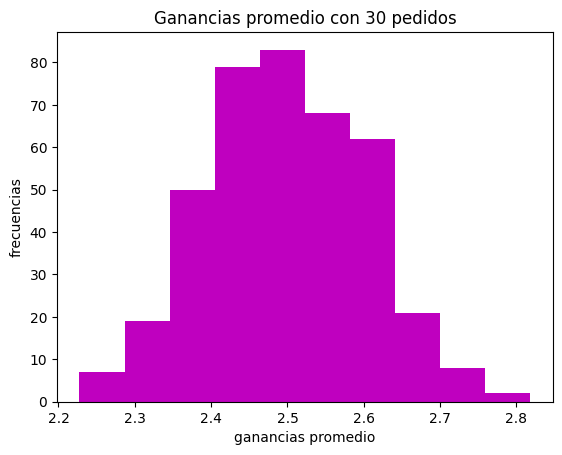

In [332]:
plt.hist(mod30, color='m')
plt.xlabel('ganancias promedio')
plt.ylabel('frecuencias')
plt.title('Ganancias promedio con 30 pedidos')
plt.show()

In [279]:
print('Las ganancias promedio son',np.mean(mod30),'euros y con desviación estandar de ', np.std(mod30),'euros')

Las ganancias promedio son 2.4992828181948172 euros y con desviación estandar de  0.1047889402169444 euros


**Calculamos $N$ para 40 pedidos**

In [222]:
n40= (2*np.std(p40)*1.96/0.05)**2 #Calculo de N
print(n40)
N40=mat.ceil(n40)#Redondeamos N al entero de arriba

380.22239831642935


Repetimos el experimento N=N40 veces

In [277]:
def modelop4(n):  #N calculado como número de simulaciones
    gananciaspromedio=[]
    for i in range(n):  #Repetimos el modelo N veces
        s = simulacion(40) #Mandamos a llamar a nuestra función que calcula la ganancia promedio en 1000 días como una muestra
        gananciaspromedio.append(np.mean(s))  #Calculamos la media de ganancia al día con 1000 días como una muestra
    return gananciaspromedio  #Lista de tamaño N con las medias muestrales, donde cada muestra es la ganancia promedio al día al simular 2100 días

In [280]:
mod40=modelop4(N40)

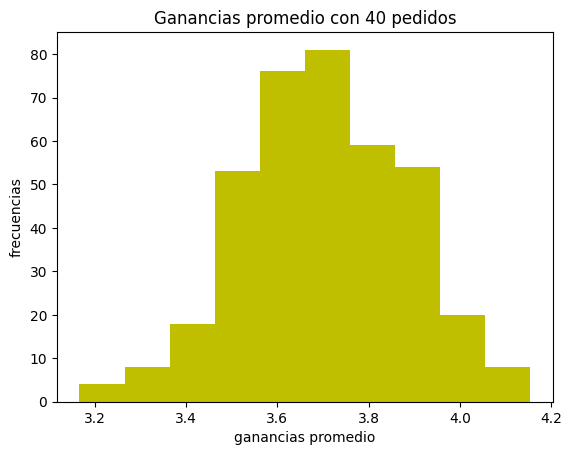

In [333]:
plt.hist(mod40,color='y')
plt.xlabel('ganancias promedio')
plt.ylabel('frecuencias')
plt.title('Ganancias promedio con 40 pedidos')
plt.show()

In [290]:
print('Las ganancias promedio son',np.mean(mod40),'euros y con desviación estandar de ', np.std(mod40),'euros')

Las ganancias promedio son 3.7032511068271297 euros y con desviación estandar de  0.17879543040587123 euros


**Calculamos $N$ para 60 pedidos**

In [223]:
n60= (2*np.std(p60)*1.96/0.05)**2 #Calculo de N
print(n60)
N60=mat.ceil(n60)#Redondeamos N al entero de arriba

6068.710205029289


Repetimos el experimento N=N60 veces con 1000 días simuladas en cada muestra

In [283]:
def modelop6(n):  #N calculado como número de simulaciones
    gananciaspromedio=[]
    for i in range(n):  #Repetimos el modelo N veces
        s = simulacion(60) #Mandamos a llamar a nuestra función que calcula la ganancia promedio en 1000 días como una muestra
        gananciaspromedio.append(np.mean(s))  #Calculamos la media de ganancia al día con 1000 días como una muestra
    return gananciaspromedio  #Lista de tamaño N con las medias muestrales, donde cada muestra es la ganancia promedio al día al simular 2100 días

In [284]:
mod60=modelop6(N60)

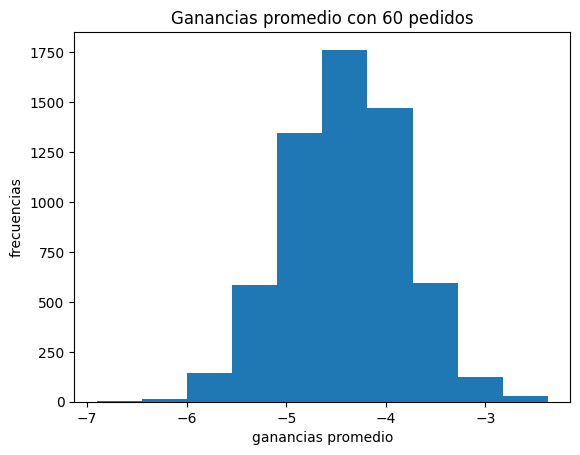

In [285]:
plt.hist(mod60)
plt.xlabel('ganancias promedio')
plt.ylabel('frecuencias')
plt.title('Ganancias promedio con 60 pedidos')
plt.show()

In [291]:
print('Las ganancias promedio son',np.mean(mod60),'euros y con desviación estandar de ', np.std(mod60),'euros')

Las ganancias promedio son -4.4027107914364585 euros y con desviación estandar de  0.5903336109513543 euros


**Calculamos $N$ para 70 pedidos**

In [224]:
n70= (2*np.std(p70)*1.96/0.05)**2 #Calculo de N
print(n70)
N70=mat.ceil(n70)#Redondeamos N al entero de arriba

8334.216095408943


Repetimos el experimento N=N70 veces con 1000 días simuladas en cada muestra

In [287]:
def modelop7(n):  #N calculado como número de simulaciones
    gananciaspromedio=[]
    for i in range(n):  #Repetimos el modelo N veces
        s = simulacion(70) #Mandamos a llamar a nuestra función que calcula la ganancia promedio en 1000 días como una muestra
        gananciaspromedio.append(np.mean(s))  #Calculamos la media de ganancia al día con 1000 días como una muestra
    return gananciaspromedio  #Lista de tamaño N con las medias muestrales, donde cada muestra es la ganancia promedio al día al simular 2100 días

In [288]:
mod70=modelop7(N70)

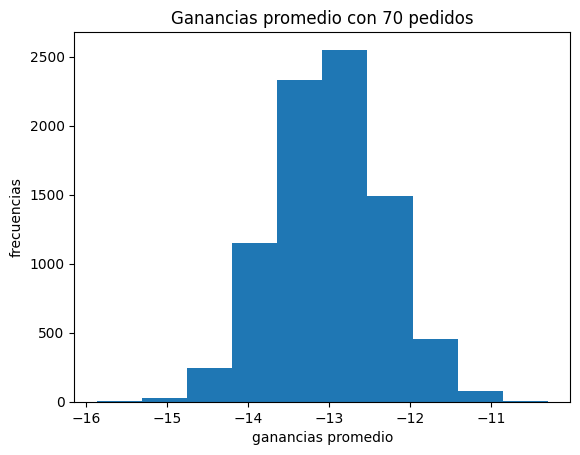

In [289]:
plt.hist(mod70)
plt.xlabel('ganancias promedio')
plt.ylabel('frecuencias')
plt.title('Ganancias promedio con 70 pedidos')
plt.show()

In [292]:
print('Las ganancias promedio son',np.mean(mod70),'euros y con desviación estandar de ', np.std(mod70),'euros')

Las ganancias promedio son -12.990917597685678 euros y con desviación estandar de  0.6715498525540803 euros


#**Comparando los modelos para ver que número de pedidos es el que nos da la mejor ganancia diaria promedio**

**Pedir 40 pedidos nos da el mejor promedio de ganancias al día**

## **7.Hallar intervalos de confianza**
\
$$\bar{x}-z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} < \mu < \bar{x}+z_{\alpha/2}\cdot \frac{s}{\sqrt{n}}$$

**Con 50 pedidos diarios**

In [338]:
np.mean(mod50) - 1.96*np.std(mod50)/np.sqrt(N50), np.mean(mod50) + 1.96*np.std(mod50)/np.sqrt(N50)

(1.3910252992786702, 1.4196307282459801)

**Con 30 pedidios diarios**

In [339]:
np.mean(mod30) - 1.96*np.std(mod30)/np.sqrt(N30), np.mean(mod30) + 1.96*np.std(mod30)/np.sqrt(N30)

(2.4890006412894174, 2.509564995100217)

**Con 40 pedidos diarios**

In [340]:
np.mean(mod40) - 1.96*np.std(mod40)/np.sqrt(N40), np.mean(mod40) + 1.96*np.std(mod40)/np.sqrt(N40)

(3.685297570757105, 3.7212046428971544)

**Con 60 pedidos**

In [342]:
np.mean(mod60) - 1.96*np.std(mod60)/np.sqrt(N60), np.mean(mod60) + 1.96*np.std(mod60)/np.sqrt(N60)

(-4.417563135908795, -4.387858446964122)